In [1]:
from qiskit import __version__
print(__version__)

1.3.2


## Vectors and matrices in Python
Qiskit uses the Python programming language, so before discussing Qiskit specifically, it may be helpful to some to very briefly discuss matrix and vector computations in Python.

In Python, matrix and vector computations can be performed using the array class from the NumPy library, which provides functionality for many numerical and scientific computations. The following code loads this library, defines two column vectors, ket0 and ket1 , corresponding to the qubit state vectors and then prints their average.

In [2]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


## Creating Operations

In [9]:
M1 = np.array([[1,0],[0,0]])
M2 = np.array([[0,0],[0,1]])
M = M1/2 + M2/2
print(M)

[[0.5 0. ]
 [0.  0.5]]


## Matrix Multiplication

In [11]:
M12 = np.matmul(M1,M2)
M21 = np.matmul(M2,M1)
M11 = np.matmul(M1,M1)
M22 = np.matmul(M2,M2)
print(M12)
print(M21)
print(M11)
print(M22)

[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[1 0]
 [0 0]]
[[0 0]
 [0 1]]


## Qiskit Array to Latex

In [19]:
from qiskit.visualization import array_to_latex
display(array_to_latex(M11, prefix="\\text{M11} = "))
display(array_to_latex(M12, prefix="\\text{M12} = "))
display(array_to_latex(M21, prefix="\\text{M21} = "))
display(array_to_latex(M22, prefix="\\text{M22} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Defining and displaying state vectors

<IPython.core.display.Latex object>

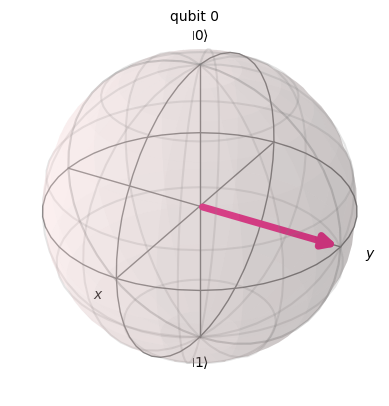

In [42]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1j/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

#display(u)
#display(u.draw("text"))
display(u.draw("latex"))
#display(u.draw("qsphere"))
display(u.draw("bloch"))    
#display(u.draw("latex_source"))

#### How to check if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1)

In [22]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

#### Simulating measurements using Statevector

In [23]:
display(v.draw("latex"))
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

#### Sampling
StatevectorCopy to clipboard also comes with a sample_counts method that allows for the simulation of any number of measurements on the system, each time starting with a fresh copy of the state. For example, the following code shows the outcome of measuring the vector v 1000 times, which (with high probability) results in the outcome 0 approximately 5 out of every 9 times (or about  555 of the 1000 trials) and the outcome 1 approximately 4 out of every 9 times (or about 444 out of the  1000 trials). The code that follows also demonstrates the plot_histogram function from the qiskit.visualization module for visualizing the results.

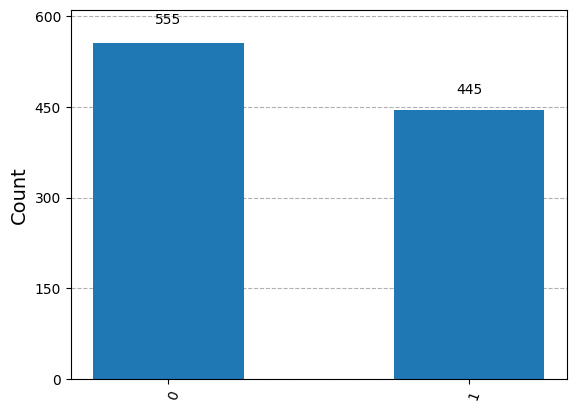

In [24]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

### Defining Operators

In [26]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

We can apply a unitary operation to a state vector using the evolve method.

In [33]:
v = Statevector([1, 0])
print(f"Before any operator")
display(v.draw("latex"))
print("After applying Y Operator")
v = v.evolve(Y)
display(v.draw("latex"))
print("After applying H Operator")
v = v.evolve(H)
display(v.draw("latex"))

Before any operator


<IPython.core.display.Latex object>

After applying Y Operator


<IPython.core.display.Latex object>

After applying H Operator


<IPython.core.display.Latex object>

## Quantum Circuits Primer

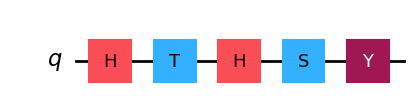

In [35]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1) # Quantum Circuit with one Qubit

circuit.h(0) # Apply Hadamard Gate. Zero means to apply it on the first Qubit
circuit.t(0) 
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl")) # mpl means Matplotlib rendering

The operations are applied sequentially, starting on the left and ending on the right in the diagram. A handy way to get the unitary matrix corresponding to this circuit is to use the from_circuit method from the Operator class.

In [36]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

A Quantum Circuit is essentially an Operator composed of different gates. We can also initialize a quantum state vector and then apply the circuit to it using the evolve method.

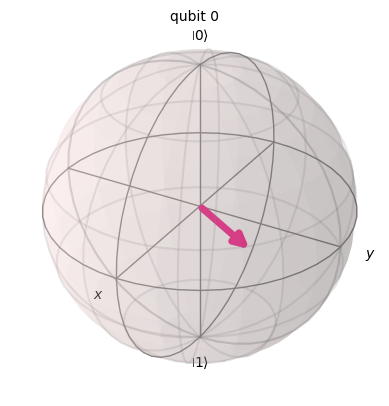

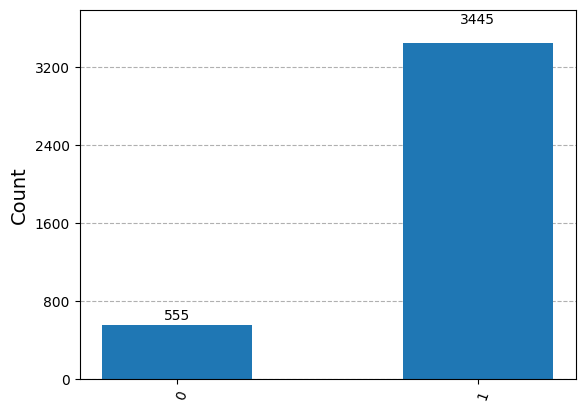

In [40]:
ket0 = Statevector([1, 0])
v = ket0.evolve(Operator.from_circuit(circuit))
display(v.draw("bloch"))
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))